<a href="https://colab.research.google.com/github/jaidatta71/ML---Berkeley/blob/main/Activity%208.4%3A%20The%20%E2%80%9CBest%E2%80%9D%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Self-Study Colab Activity 8.4: The “Best” Model.

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. During many of the assignments, you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built-in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features' importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` module implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [ ]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cali = pd.read_csv('drive/MyDrive/colab_activity8_4_starter/data/housing.csv')

In [ ]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
correlation_matrix = cali.corr(numeric_only=True)

# Get correlations with SalePrice
saleprice_corr = correlation_matrix['median_house_value']

# Sort correlations in descending order
sorted_corr = saleprice_corr.sort_values(ascending=False)

# Display top features with highest positive correlation (excluding SalePrice itself)
print(sorted_corr[1:9])

median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


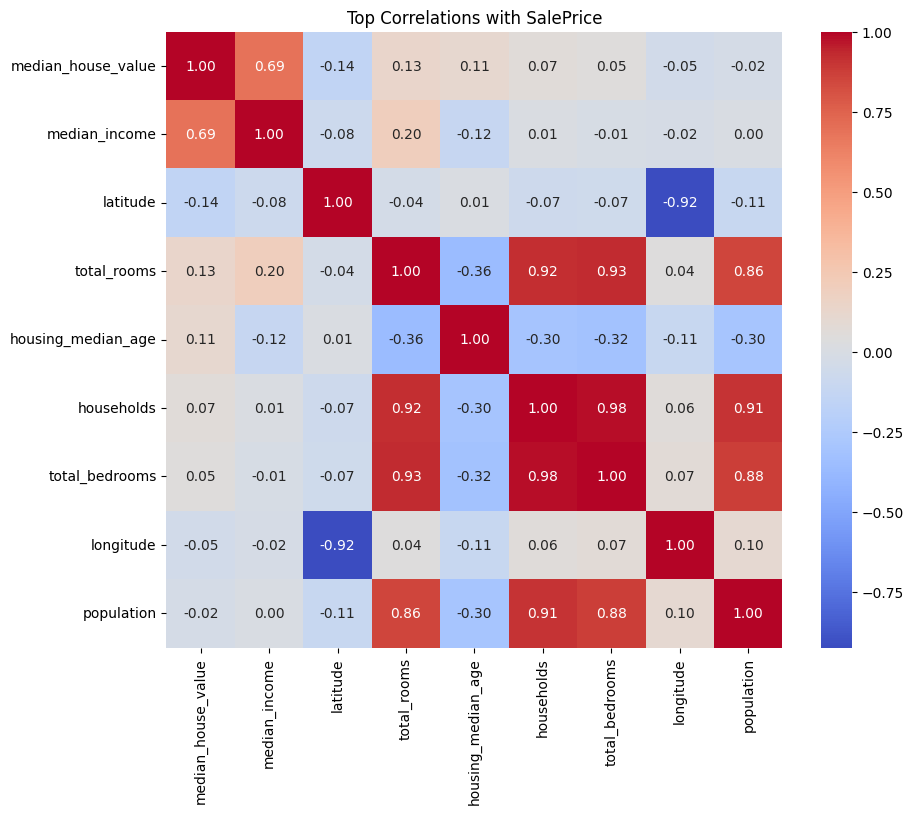

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (numeric columns only)
corr_matrix = cali.corr(numeric_only=True)

# Get top correlations with SalePrice
top_corr = corr_matrix['median_house_value'].abs().sort_values(ascending=False).head(10).index

# Subset the correlation matrix
top_corr_matrix = cali[top_corr].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Top Correlations with SalePrice")
plt.show()

In [ ]:
X = cali.drop('median_house_value', axis = 1)
y = cali['median_house_value']
print(type(X))
print(type(y))
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=22)
X_train.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14697,-117.09,32.79,36.0,1936.0,345.0,861.0,343.0,3.8333,NEAR OCEAN
9338,-122.61,37.99,40.0,7737.0,1488.0,3108.0,1349.0,4.4375,NEAR OCEAN
19511,-121.02,37.62,30.0,1721.0,399.0,1878.0,382.0,2.5363,INLAND
14232,-117.04,32.68,11.0,1875.0,357.0,1014.0,386.0,4.3750,NEAR OCEAN
13398,-117.53,34.10,5.0,2185.0,488.0,1379.0,458.0,3.7917,INLAND


In [ ]:
features = ['total_rooms', 'housing_median_age','ocean_proximity']
print(type(X_train[features]))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_mses = []
test_mses = []
#for degree in 1 - 5
for i in range(1, 6):
    #create pipeline with PolynomialFeatures degree i

    #ADD APPROPRIATE ARGUMENTS IN POLYNOMIALFEATURES
    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree=i), make_column_selector(dtype_include=np.number)),
                                           (OneHotEncoder(categories = [['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']]), ['ocean_proximity']))

    pipe_3 = Pipeline([('transformer', poly_ordinal_ohe),
                       ('linreg', LinearRegression())
                      ])

    #fit on train
    pipe_3.fit(X_train[features], y_train)

    #predict on train and test
    pipe_3.predict(X_train[features])
    pipe_3.predict(X_test[features])
    #compute mean squared errors
   # train_mses  = mean_squared_error(y_train, quad_train_preds)
   # test_mses   = mean_squared_error(y_test, quad_train_preds)
    #append to train_mses and test_mses respectively
    train_mses.append(mean_squared_error(y_train, pipe_3.predict(X_train[features])))
    test_mses.append(mean_squared_error(y_test, pipe_3.predict(X_test[features])))

# YOUR CODE HERE
#raise NotImplementedError()

# Answer check
print(train_mses)
print(test_mses)

[9984118055.74201, 9589656206.7805, 12399498760.151962, 12486974824.633104, 12605300666.115057]
[9492436247.005955, 9107092644.948664, 11673209084.735916, 11741117126.270111, 11826901492.008213]


The Complexity that minimized Test Error was: 2


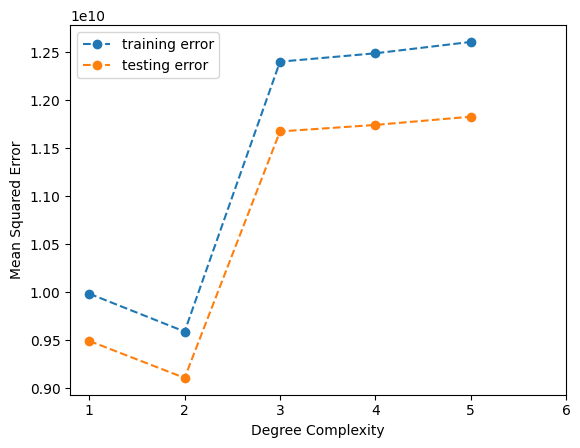

In [ ]:
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 6), train_mses, '--o', label = 'training error')
plt.plot(range(1, 6), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 7), range(1, 7))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();

In [ ]:
# model: a trained estimator (e.g., LinearRegression, RandomForest)
# X_val: validation features
# y_val: validation targets
result = permutation_importance(pipe_3, X_train[features], y_train, n_repeats=10, random_state=42)

In [ ]:
importances = result.importances_mean
stds = result.importances_std
feature_names = X_train[features].columns  # if using a DataFrame

# Display sorted importance
sorted_idx = np.argsort(importances)[::-1]
for i in sorted_idx:
    print(f"{feature_names[i]}: {importances[i]:.4f} ± {stds[i]:.4f}")

housing_median_age: 3.7101 ± 2.1966
total_rooms: 2.2545 ± 1.1096
ocean_proximity: 0.0000 ± 0.0000


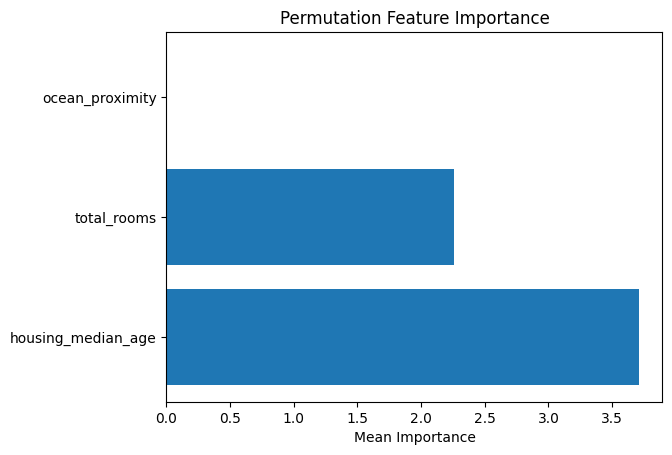

In [ ]:
import matplotlib.pyplot as plt

plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Mean Importance")
plt.title("Permutation Feature Importance")
plt.show()